In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling Section

This data was taken from insideairbnb.com. This is a summary list of all the host data and it was scraped in November 2018. 

In [38]:
data=pd.read_csv('detailed listing amended.csv', encoding = "ISO-8859-1", low_memory=False)
data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,...,10.0,9.0,9.0,f,f,strict_14_with_grace_period,f,f,1,0.04
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,...,9.0,9.0,9.0,t,f,moderate,t,t,1,1.45
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,...,10.0,10.0,9.0,f,f,strict_14_with_grace_period,f,f,17,0.14
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood â it is quiet,...",A simple self service breakfast is available â...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,...,10.0,9.0,9.0,f,f,moderate,f,f,3,0.30
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,...,10.0,9.0,9.0,f,f,moderate,f,f,1,0.73


This section of the code is that we're keeping all the columns that we want and have identified that it's useful for analysis

In [127]:
# only keeping the columns that we want
data =data[['id',
            'name',
            'summary',
            'space',
            'description',
            'neighborhood_overview',
            'notes',
            'transit',
            'access',
            'interaction',
            'house_rules',
            'host_id',
            'host_name',
            'host_since',
            'host_about',
            'host_response_time',
            'host_response_rate',
            'host_is_superhost',
            'host_listings_count',
            'host_total_listings_count',
            'host_has_profile_pic',
            'host_identity_verified',
            'street',
            'neighbourhood',
            'neighbourhood_cleansed',
            'city',
            'state',
            'zipcode',
            'market',
            'smart_location',
            'latitude',
            'longitude',
            'is_location_exact',
            'property_type',
            'room_type',
            'accommodates',
            'bathrooms',
            'bedrooms',
            'beds',
            'bed_type',
            'amenities',
            'square_feet',
            'price',
            'weekly_price',
            'monthly_price',
            'security_deposit',
            'cleaning_fee',
            'guests_included',
            'extra_people',
            'minimum_nights',
            'maximum_nights',
            'calendar_updated',
            'has_availability',
            'availability_30',
            'availability_60',
            'availability_90',
            'availability_365',
            'number_of_reviews',
            'first_review',
            'last_review',
            'review_scores_rating',
            'review_scores_accuracy',
            'review_scores_cleanliness',
            'review_scores_checkin',
            'review_scores_communication',
            'review_scores_location',
            'review_scores_value',
            'instant_bookable',
            'cancellation_policy',
            'require_guest_profile_picture',
            'require_guest_phone_verification',
            'calculated_host_listings_count',
            'reviews_per_month']]

Converting first_review, last_review and calendar_last_scraped from string to date so that we don't need to worry about conversion later.

In [40]:
data['first_review']=pd.to_datetime(data['first_review'])
data['last_review']=pd.to_datetime(data['last_review'])
data['host_since']=pd.to_datetime(data['host_since'])
print(data.dtypes)

id                                           int64
name                                        object
summary                                     object
space                                       object
description                                 object
neighborhood_overview                       object
notes                                       object
transit                                     object
access                                      object
interaction                                 object
house_rules                                 object
host_id                                      int64
host_name                                   object
host_since                          datetime64[ns]
host_about                                  object
host_response_time                          object
host_response_rate                         float64
host_is_superhost                           object
host_listings_count                        float64
host_total_listings_count      

The next step, I cleaned up the city column as this column is crucial in understanding how the prices differ from the distance between the city and other suburbs. I've also dropped any NaN cities as non identifiable cities would be pointless in our analysis. In this step, I've cleaned up the name columns to remove any rows that are in different characters other than numbers or characters as the airbnb data also contains characters in other languages

In [41]:
#cleaning up the city data
data['city']=data['city'].astype(str).str.partition(',')
data['city']=data['city'].astype(str).str.partition('.')
data['city']=data['city'].astype(str).str.partition('-')
data['city']=data['city'].astype(str).str.title()
data['city']=data['city'].astype(str).str.partition('(')
data['city']=data['city'].astype(str).str.partition('/')
data['city']=data['city'].astype(str).str.rstrip() 
data['city']=data['city'].astype(str).str.lstrip()

#removing any data that doesn't characters or numbers
data=data[data['name'].astype(str).str.contains('[a-zA-Z0-9_-]+$')] 

#removing data in city column that doesn't have characters or numbers
data=data[data['city'].astype(str).str.contains('[a-zA-Z0-9_-]+$')] 

#cleaning up city data to their correct categories
data['city']=data['city'].replace('Brunswick / Melbourne', 'Brunswick')
data['city']=data['city'].replace('Dockland', 'Docklands')
data['city']=data['city'].replace('Doncaster Vic 3108', 'Doncaster')
data['city']=data['city'].replace('Doncasterï¼Melbourne', 'Doncaster')
data['city']=data['city'].replace('East St', 'St Kilda East')
data['city']=data['city'].replace('Saint Kilda', 'St Kilda')
data['city']=data['city'].replace('Saint Kilda East', 'St Kilda East')
data['city']=data['city'].replace('Saint Kilda West', 'St Kilda West')
data['city']=data['city'].replace('St Kilda West Melbourne', 'St Kilda West')
data['city']=data['city'].replace('St', 'St Kilda')
data['city']=data['city'].replace('Melborne', 'Melbourne')
data['city']=data['city'].replace('Melbourne Cbd', 'Melbourne')
data['city']=data['city'].replace('Melbourne City', 'Melbourne')
data['city']=data['city'].replace('Melbourne Vic 3000', 'Melbourne')
data['city']=data['city'].replace('Melbourne Vic 3004', 'Melbourne')
data['city']=data['city'].replace('Melbourne Victoria', 'Melbourne')
data['city']=data['city'].replace('Mlebourne', 'Melbourne')
data['city']=data['city'].replace('Praharan', 'Prahran')
data['city']=data['city'].replace('Somerton Vic 3062', 'Somerton')
data['city']=data['city'].replace('South Yarra Vic 3141', 'South Yarra')
data['city']=data['city'].replace('Southbank Melbourne', 'Southbank')
data['city']=data['city'].replace('Strthtulloch', 'Strathtulloh')
data['city']=data['city'].replace('Wantirna South Vic 3152', 'Wantirna South')
data['city']=data['city'].replace('Wheelers Hill Vic 3150', 'Wheelers Hill')
data['city']=data['city'].replace('Balaclava Vic 3183', 'Balaclava')
data['city']=data['city'].replace('Armadale North', 'Armadale')
data['city']=data['city'].replace('Blackburn Vic 3130', 'Blackburn')
data['city']=data['city'].replace('Dandenong Ranges', 'Dandenong')
data['city']=data['city'].replace('East Brunswick', 'Blackburn')
data['city']=data['city'].replace('Blackburn Vic 3130', 'Brunswick East')
data['city']=data['city'].replace('East Doncaster', 'Doncaster East')
data['city']=data['city'].replace('East St Kilda', 'St Kilda East')
data['city']=data['city'].replace('Mckinnon', 'McKinnon')
data['city']=data['city'].replace('Mt Dandenong', 'Mount Dandenong')
data['city']=data['city'].replace('Mt Waverley', 'Mount Waverley')
data['city']=data['city'].replace('North Fitzroy', 'Fitzroy')
data['city']=data['city'].replace('Northcote South', 'Northcote')
data['city']=data['city'].replace('Saint Albans', 'St Albans')
data['city']=data['city'].replace('Saint Helena', 'St Helena')
data['city']=data['city'].replace('South Wharf', 'Southbank')
data['city']=data['city'].replace('Stkilda East', 'St Kilda East')
data['city']=data['city'].replace('Victoria', 'Melbourne')

#grouping the city data
data['id'].groupby(data['city']).count().sort_values(ascending=False)

#dropping any unidentifiable cities
data['city'].dropna()

city
Melbourne               3423
Southbank                968
St Kilda                 825
South Yarra              735
Docklands                496
Richmond                 449
Carlton                  429
Brunswick                367
Fitzroy                  304
North Melbourne          280
Elwood                   265
South Melbourne          240
Northcote                238
Collingwood              236
Port Melbourne           227
Abbotsford               222
Prahran                  211
Fitzroy North            205
West Melbourne           200
East Melbourne           168
St Kilda East            166
Brunswick East           152
Windsor                  151
Point Cook               147
Hawthorn                 145
Footscray                141
Healesville              127
Preston                  116
Box Hill                 114
Glen Waverley            112
                        ... 
Preston West               1
Powelltown                 1
Cardinia Shire             1
Cardinia 

Next step is to upload the house prices that was scraped from the melbourne housing website. This list was scrapped from melbourne housing that contains the city names and median prices

In [43]:
prices = pd.read_csv('house prices web scaping.csv')
prices.head()

,rank,city,distance,distance_in_km,cardinal_direction,median_prices
0,1,Melbourne,0.1km,0.1,North,680100.0
1,2,Southbank,1km,1.0,South,802600.0
2,3,Docklands,1.1km,1.1,South-west,1294400.0
3,4,West Melbourne,1.2km,1.2,West,1223700.0
4,5,East Melbourne,1.8km,1.8,East,3005100.0


Then I've joined both this median house prices and the main summary hosting pages.

In [44]:
#merging both the main spreadsheet and median house prices 
new_data = pd.merge(data, prices, how='left', on=['city'])

#dropping any NaNs after joining both spreadsheets
new_data.dropna()

new_data.head()

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,rank,distance,distance_in_km,cardinal_direction,median_prices
0,9835,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,NaN,"YES ! The bus (305,309) is exactly two blocks ...","Kitchen, backyard, upstairs lounge. We'd like ...",As much as the guest wants.,...,strict_14_with_grace_period,f,f,1,0.04,119.0,12.5km,12.5,East,1259700.0
1,10803,Room in Cool Deco Apartment in Brunswick,A large air conditioned room with queen spring...,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,NaN,Easy transport options - the tram is right out...,Wifi. Bathroom and kitchen is shared but I mos...,I'm home mostly but sometimes I may be working...,...,moderate,t,t,1,1.45,26.0,4.7km,4.7,North,1133400.0
2,12936,St Kilda 1BR APT+BEACHSIDE+VIEWS+PARKING+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,First floor apartment with both lift and stair...,Our apartment is located within walking distan...,Guests have exclusive and private access to th...,We don't always get to meet all our guests in ...,...,strict_14_with_grace_period,f,f,17,0.14,42.0,6.1km,6.1,South,1689800.0
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood â it is quiet,...",A simple self service breakfast is available â...,Public transport is super convenient with a ch...,You are welcome to make yourself at home in th...,Guest's privacy will be respected at all times...,...,moderate,f,f,3,0.30,51.0,6.9km,6.9,North-east,1128600.0
4,16760,Melbourne BnB near City & Sports,NaN,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,NaN,NaN,NaN,NaN,NaN,...,moderate,f,f,1,0.73,50.0,6.7km,6.7,South-east,1318500.0


I've placed all the city data into specific bins to identify the distance between each city and the CBD. This is help with analysing at the later stage

In [45]:
bins = [0, 10, 20, 30, 50, 100]
names = ['within 10 km from CBD', '10 to 20 km from CBD', '20 to 30km from CBD', '30 to 50km from CBD', 'more than 50km from CBD']

new_data['distance_bins'] = pd.cut(new_data['distance_in_km'], bins, labels=names)
new_data['id'].groupby(new_data['distance_bins']).count().sort_values(ascending=False)


distance_bins
within 10 km from CBD      13726
10 to 20 km from CBD        2411
20 to 30km from CBD          952
30 to 50km from CBD          863
more than 50km from CBD      277
Name: id, dtype: int64

# Exploratory Analysis

By using the median prices from the melbourne housing website, we are able to estimate daily prices. Melbourne has a rule of thump that the rental income is 6% of the purchase price. As such, I've used 6% of the median purchase price.

In [46]:
new_data['annual_rental']=new_data['median_prices']*6/100
new_data['daily_rental']=new_data['annual_rental']/365

By grouping the distance grouped with the prices, we can see that the mean prices increases after 30km from the CBD. However, the numbers of listings lesser as the distance grows from the city which may cause increase in demand and therefore, increasing the prices

In [47]:
new_data['price'].groupby(new_data['distance_bins']).describe()

,count,mean,std,min,25%,50%,75%,max
distance_bins,,,,,,,,
within 10 km from CBD,13726.0,151.372432,189.348268,0.0,79.0,120.0,165.0,9000.0
10 to 20 km from CBD,2411.0,130.845292,299.169715,0.0,50.0,81.0,150.0,12625.0
20 to 30km from CBD,952.0,114.108193,156.086194,15.0,44.0,74.0,140.0,3400.0
30 to 50km from CBD,863.0,202.889919,467.911101,18.0,81.0,140.0,233.5,12499.0
more than 50km from CBD,277.0,220.086643,159.738667,0.0,129.0,181.0,270.0,1499.0


Based on the summary table above, I had a look at putting them into boxplots as this will give us a better understand of the prices. However, there were too many outliers and we will need to filter out the outliers. The plot below tells us that the price range for any property more than 30KM from the CBD. Those properties within 30KM from the CBD also have substantially more outliers. 

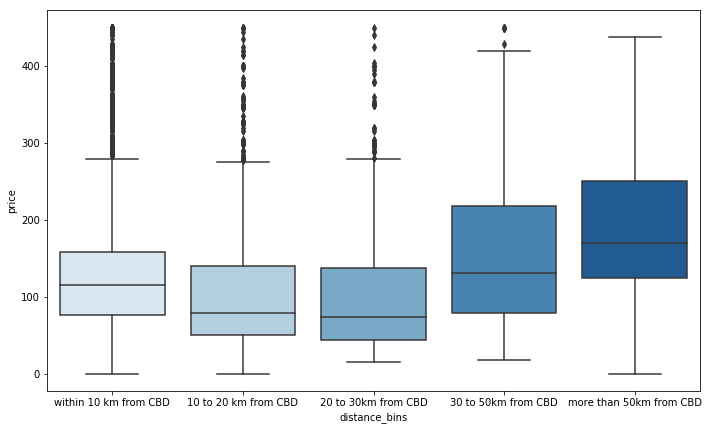

In [128]:
#this is to remove any outliers 
filtered_data = new_data[new_data['price']<=450]

a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(x=filtered_data['distance_bins'], y=filtered_data['price'], palette='Blues', ax=ax)
plt.show()

I was also to understand if there is any price differences if the host is a superhost. From the two charts below, we can see that there is a difference in median and mean prices when the host is a superhost. 

In the median prices chart, we can see that if the listing is a superhost, there is a slight increase in prices in property prices less than 50KM. Whereas on average prices, the prices increase slightly if the host is a superhost and when property is less tahn 20KM away from CBD. 

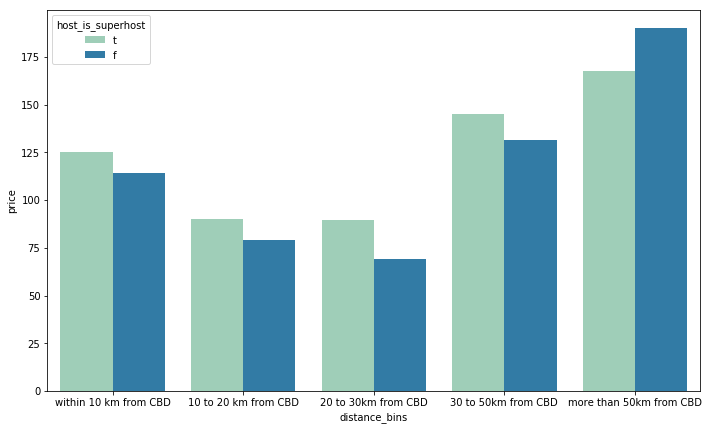

In [218]:
# barplot - host is superhost by median price

a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df=new_data.groupby(['distance_bins', 'host_is_superhost']).agg({'price' : 'median'}).reset_index().sort_values('host_is_superhost', ascending=False)
sns.barplot(x='distance_bins', y='price', hue='host_is_superhost', data=distance_df, palette="YlGnBu",ax=ax)

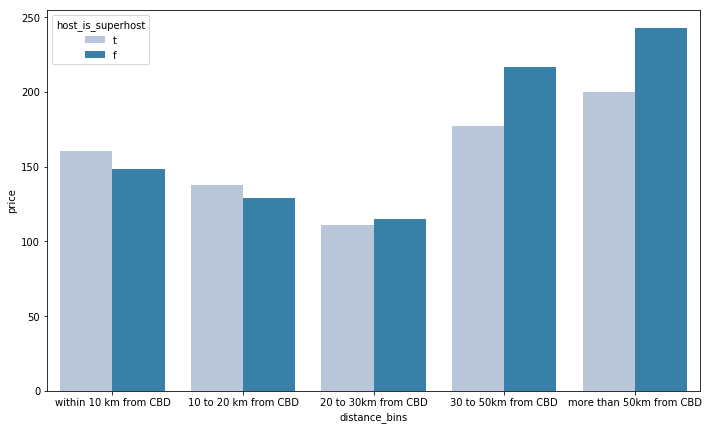

In [220]:
# barplot - host is superhost by mean price

a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df2=new_data.groupby(['distance_bins', 'host_is_superhost']).agg({'price' : 'mean'}).reset_index().sort_values('host_is_superhost', ascending=False)
sns.barplot(x='distance_bins', y='price', hue='host_is_superhost', data=distance_df2, palette="PuBu", ax=ax)

The mean and median for instant bookable across all distance bins appears to be the same. This means that the distribution across all distance bins are uniformly distributed. Interestingly, the price increases when the listing does not provide instant bookable function

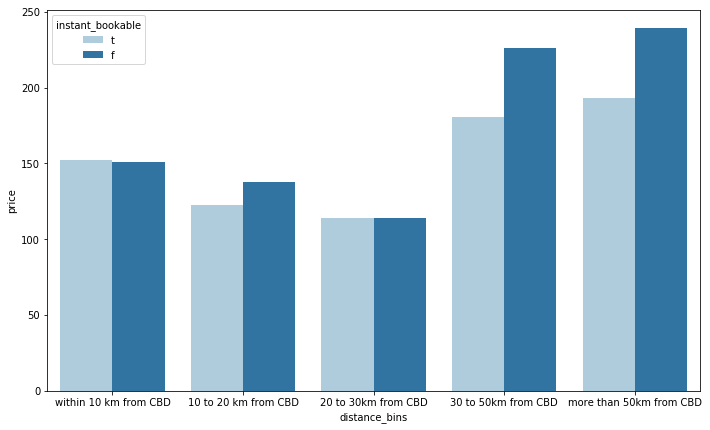

In [221]:
#barplot by mean and instant bookable

a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df2=new_data.groupby(['distance_bins', 'instant_bookable']).agg({'price' : 'mean'}).reset_index().sort_values('instant_bookable', ascending=False)
sns.barplot(x='distance_bins', y='price', hue='instant_bookable', data=distance_df2, palette="Paired", ax=ax)

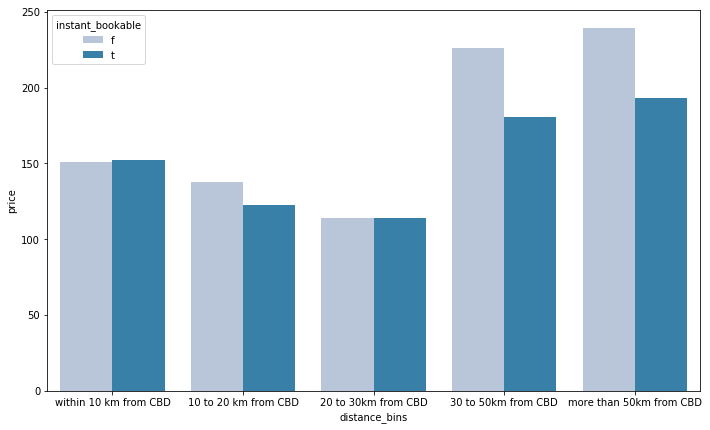

In [214]:
#barplot by median and instant bookable

a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
distance_df2=new_data.groupby(['distance_bins', 'instant_bookable']).agg({'price' : 'mean'}).reset_index().sort_values('instant_bookable', ascending=False)
sns.barplot(x='distance_bins', y='price', hue='instant_bookable', data=distance_df2, palette="PuBu", ax=ax)

Next, I've created a new data set to see the correlation between all variables but beforehand, I've converted the columns which has true or false into numerics as the correlation function wouldn't work with categorical variables. Based on the correlation summary, we can see that the price factor is positively correlated with cleaning_fee, security deposit and square feet. This makes sense as the larger the property (square feet), the more security deposit and cleaning fee will be required. In addition to this, the bedrooms, bathrooms and accomodates appears to be positively correlated to the price.

The other factor that is interesting on this correlation is that the review scores rating is also positively correlated on when the host is a superhost. This also makes sense as for a host to obtain the superhost badge, the host will need to have and maintain a certain standard in reviews in order to obtain and maintain the badge. Interestingly, this variable has little correlation to the price. 

In [143]:
filtered_df=new_data[['price', 'review_scores_rating', 'availability_365', 'availability_30', 
                      'cleaning_fee', 'accommodates', 'bedrooms', 'bathrooms',
                      'security_deposit', 'guests_included', 'host_is_superhost', 'instant_bookable', 
                      'cancellation_policy', 'review_scores_location', 'review_scores_cleanliness',
                      'square_feet', 'number_of_reviews', 'reviews_per_month', 'host_has_profile_pic', 
                      'host_listings_count', 'host_response_time','review_scores_communication']]

filtered_df['host_is_superhost']=filtered_df['host_is_superhost'].replace('t',1)
filtered_df['host_is_superhost']=filtered_df['host_is_superhost'].replace('f',0)

filtered_df['instant_bookable']=filtered_df['instant_bookable'].replace('t',1)
filtered_df['instant_bookable']=filtered_df['instant_bookable'].replace('f',0)

filtered_df['host_has_profile_pic']=filtered_df['host_has_profile_pic'].replace('t',1)
filtered_df['host_has_profile_pic']=filtered_df['host_has_profile_pic'].replace('f',0)

corr=filtered_df.corr()
corr.style.background_gradient().set_precision(2)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

,price,review_scores_rating,availability_365,availability_30,cleaning_fee,accommodates,bedrooms,bathrooms,security_deposit,guests_included,host_is_superhost,instant_bookable,review_scores_location,review_scores_cleanliness,square_feet,number_of_reviews,reviews_per_month,host_has_profile_pic,host_listings_count,review_scores_communication
price,1,0.04,0.11,0.083,0.47,0.34,0.35,0.27,0.4,0.2,0.022,-0.0082,0.072,0.04,0.51,-0.033,-0.032,-0.0013,0.057,-0.0052
review_scores_rating,0.04,1,-0.026,-0.08,-0.018,-0.021,-4.9e-05,-0.019,-0.003,-0.023,0.23,-0.071,0.5,0.72,0.12,0.075,0.09,0.018,-0.098,0.7
availability_365,0.11,-0.026,1,0.55,0.09,0.15,0.073,0.062,0.029,0.13,0.11,0.031,-0.035,0.037,-0.014,0.14,0.08,-0.03,0.14,-0.025
availability_30,0.083,-0.08,0.55,1,0.045,0.058,0.029,0.064,0.034,0.072,0.022,0.022,-0.07,-0.017,0.0091,-0.013,0.044,-0.047,0.1,-0.072
cleaning_fee,0.47,-0.018,0.09,0.045,1,0.5,0.49,0.36,0.47,0.35,0.018,0.0032,0.048,-0.0069,0.39,-0.034,0.0015,-0.0062,0.29,-0.038
accommodates,0.34,-0.021,0.15,0.058,0.5,1,0.8,0.47,0.22,0.61,0.07,0.073,0.029,-0.00019,0.36,0.084,0.14,0.022,0.12,-0.018
bedrooms,0.35,-4.9e-05,0.073,0.029,0.49,0.8,1,0.54,0.25,0.49,0.028,-0.013,-0.00026,-0.0017,0.48,-0.027,-0.0076,0.02,0.041,-0.011
bathrooms,0.27,-0.019,0.062,0.064,0.36,0.47,0.54,1,0.23,0.31,0.02,-0.037,-0.026,-0.031,0.21,-0.05,-0.028,0.012,0.062,-0.031
security_deposit,0.4,-0.003,0.029,0.034,0.47,0.22,0.25,0.23,1,0.14,0.0095,-0.066,0.0081,-0.014,0.33,-0.055,-0.053,0.015,0.073,-0.011
guests_included,0.2,-0.023,0.13,0.072,0.35,0.61,0.49,0.31,0.14,1,0.1,0.12,0.037,0.0069,0.38,0.13,0.16,0.0059,0.16,-0.0069


# Hey Georgios, I need help with pairplot

C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

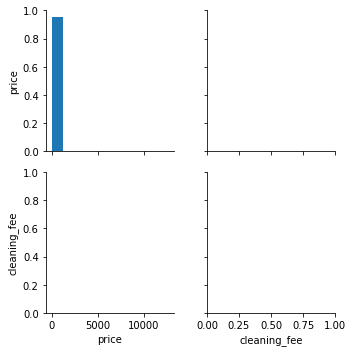

In [139]:
# help?
altered_df=filtered_df[['price', 'cleaning_fee']]

sns.pairplot(altered_df)
plt.show()

The highest number of listing that we have in this dataset is Apartment

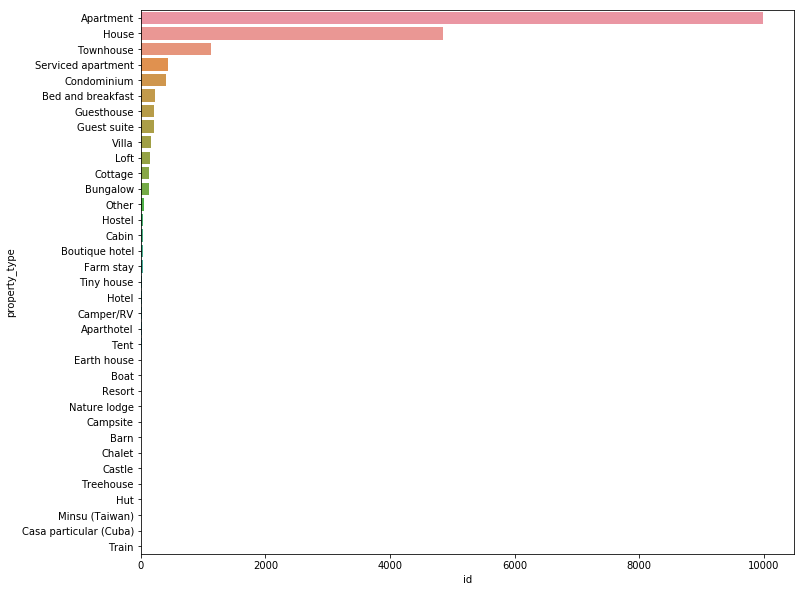

In [226]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df2=new_data.groupby(['property_type']).agg({'id' : 'count'}).reset_index().sort_values('id', ascending=False)
sns.barplot(x='id', y='property_type', data=new_df2, orient='h', ax=ax)

Based on the chart above, we know that the average prices might not show the accurate reflection of average prices of each property as there isn't sufficient data for all property type categories

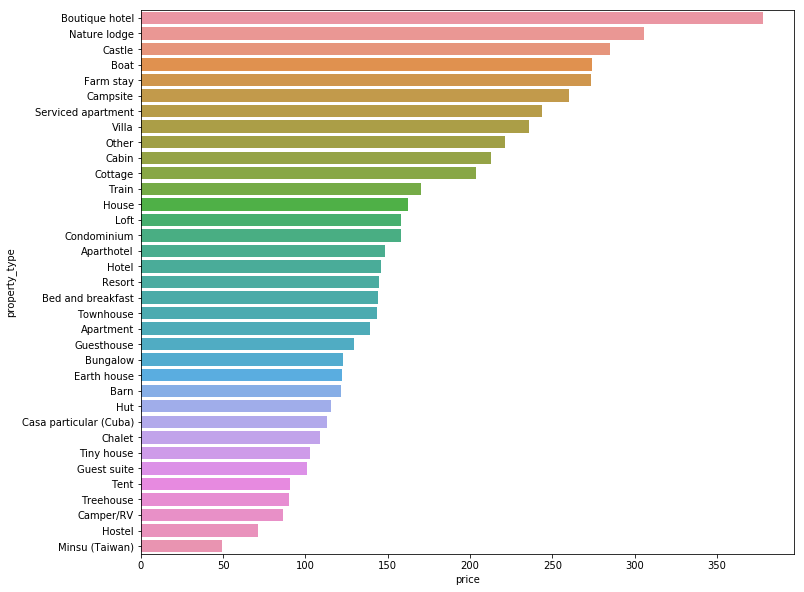

In [227]:
a4_dims = (11.7, 10) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['property_type']).agg({'price' : 'mean'}).reset_index().sort_values('price', ascending=False)
sns.barplot(x='price', y='property_type', data=new_df, orient='h', ax=ax)

# Question: How do I label the top the bar with the number of each distance bin? All google searches are pointing me to using a def or loops. 

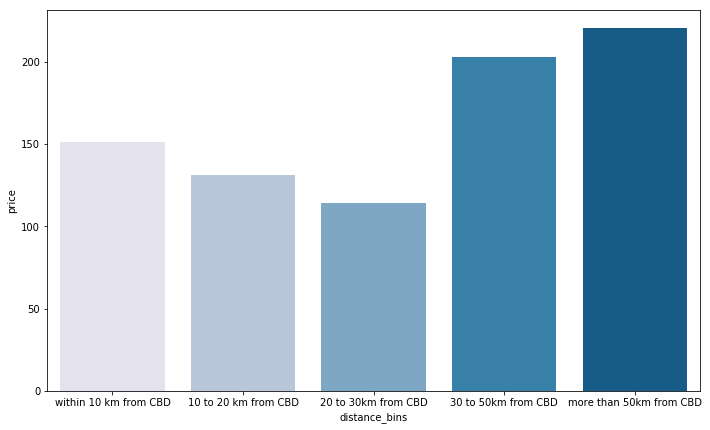

In [200]:
#height = new_data.groupby(new_data['property_type']).mean()
a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
new_df=new_data.groupby(['distance_bins']).agg({'price' : 'mean'}).reset_index().sort_values('price', ascending=False)
sns.barplot(x='distance_bins', y='price', data=new_df, palette="PuBu")

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


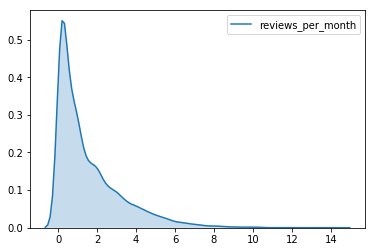

In [111]:
sns.kdeplot(new_data['reviews_per_month'], shade=True)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


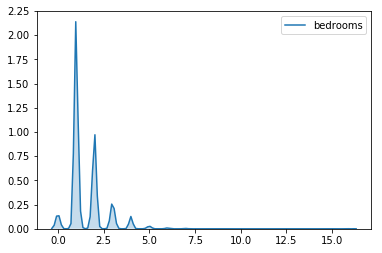

In [112]:
sns.kdeplot(new_data['bedrooms'], shade=True)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


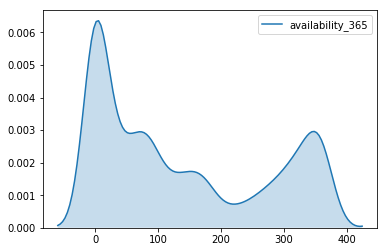

In [116]:
sns.kdeplot(new_data['availability_365'], shade=True)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


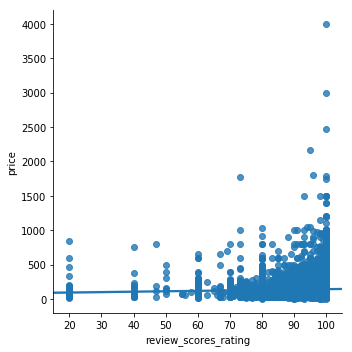

In [188]:
#sns.regplot(x=new_data['price'], y=new_data['review_scores_rating'],fit_reg=True)

sns.lmplot(x='review_scores_rating', y='price', data=new_data)

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


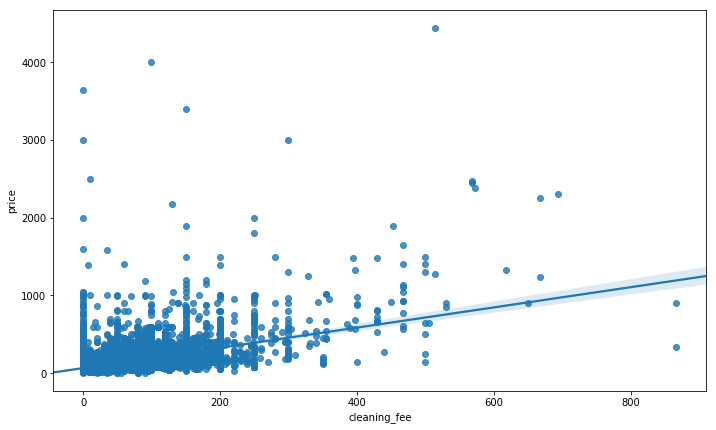

In [126]:
import matplotlib.pyplot as plt
a4_dims = (11.7, 7) #(width, height)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x=new_data['cleaning_fee'], y=new_data['price'],fit_reg=True, ax=ax)